In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# figure out what these do later
plt.style.use("fivethirtyeight")
%matplotlib inline 

In [3]:
train_data = pd.read_csv("cs-training.csv")
test_data = pd.read_csv("cs-test.csv")

In [4]:
train_data.sample(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
64177,64178,0,0.044415,34,0,0.131672,6500.0,8,0,0,0,0.0
52048,52049,0,0.037274,53,0,2192.000000,NaN,11,0,1,0,0.0
76751,76752,0,0.382587,50,0,739.000000,NaN,7,0,0,0,1.0
133880,133881,0,0.901690,32,3,0.415541,5700.0,6,0,1,0,1.0
113238,113239,0,0.003915,58,0,1363.000000,NaN,13,0,1,0,0.0
93281,93282,0,1.000000,28,1,0.059034,4200.0,3,0,0,0,0.0
35848,35849,0,0.768787,37,0,0.155761,7350.0,5,0,0,0,1.0
135567,135568,0,0.505164,74,0,0.529811,2800.0,7,0,1,0,0.0
13550,13551,0,0.412756,53,0,0.585379,10833.0,18,0,2,0,1.0
81414,81415,0,0.023950,42,0,881.000000,0.0,6,0,0,0,1.0


In [5]:
test_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

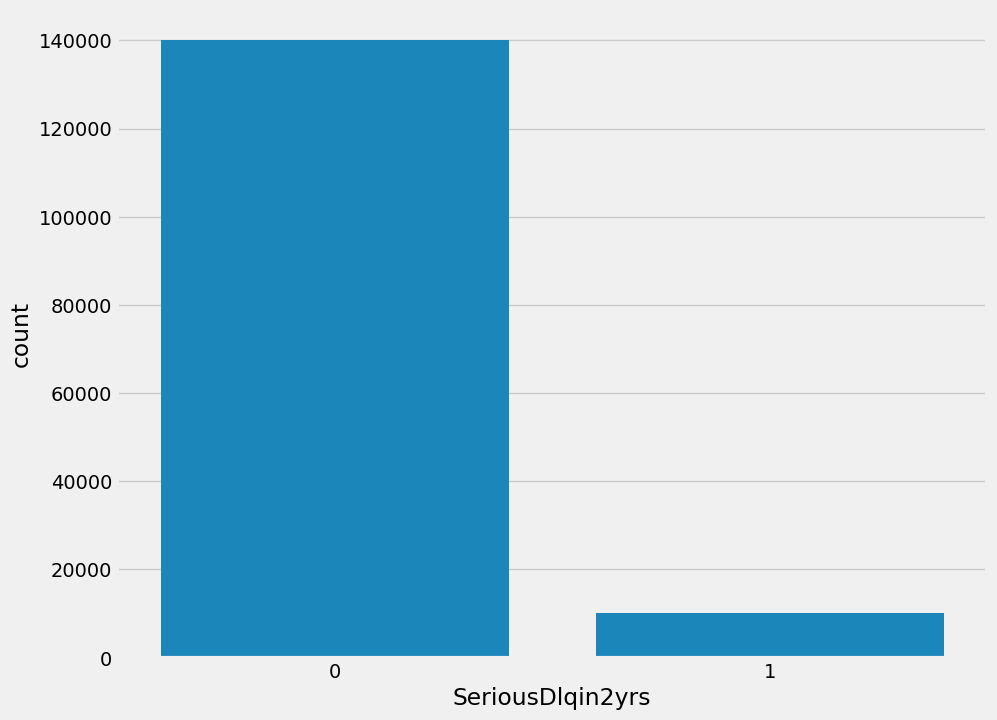

In [6]:
plt.figure(figsize=(10, 8))
sns.countplot(x="SeriousDlqin2yrs", data=train_data)

In [7]:
class_0 = train_data.SeriousDlqin2yrs.value_counts()[0]
class_1 = train_data.SeriousDlqin2yrs.value_counts()[1]
print("Total number of class_0: {}".format(class_0))
print("Total number of class_1: {}".format(class_1))
print("Event rate: {}%".format(class_1/(class_0+class_1) * 100))

Total number of class_0: 139974
Total number of class_1: 10026
Event rate: 6.683999999999999%


In [8]:
# less than legal age
train_data.loc[train_data["age"] < 18]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [9]:
train_data.loc[train_data["age"] == 0, "age"] = train_data.age.median()

In [10]:
age_working = train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60)]
age_senior = train_data.loc[(train_data["age"] >= 60)]

age_working_impute = age_working.MonthlyIncome.mean()
age_senior_impute = age_senior.MonthlyIncome.mean()

In [11]:
train_data["MonthlyIncome"] = np.absolute(train_data["MonthlyIncome"])
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].fillna(99999)
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].astype('int64')

In [12]:
train_data.loc[((train_data["age"] >= 18) & (train_data["age"] < 60)) & (train_data["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_working_impute

train_data.loc[(train_data["age"] >= 60) & (train_data["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_senior_impute

C:\Users\ellio\AppData\Local\Temp\ipykernel_30624\797404931.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6638.484232804233' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[((train_data["age"] >= 18) & (train_data["age"] < 60)) & (train_data["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_working_impute


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [14]:
train_data.loc[train_data["MonthlyIncome"] == 99999]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [15]:
train_data["NumberOfDependents"] = np.absolute(train_data["NumberOfDependents"])
train_data["NumberOfDependents"] = train_data["NumberOfDependents"].fillna(0)
train_data["NumberOfDependents"] = train_data["NumberOfDependents"].astype('int64')

In [16]:
train_data.NumberOfDependents.value_counts()

NumberOfDependents
0     90826
1     26316
2     19522
3      9483
4      2862
5       746
6       158
7        51
8        24
10        5
9         5
20        1
13        1
Name: count, dtype: int64

<Axes: >

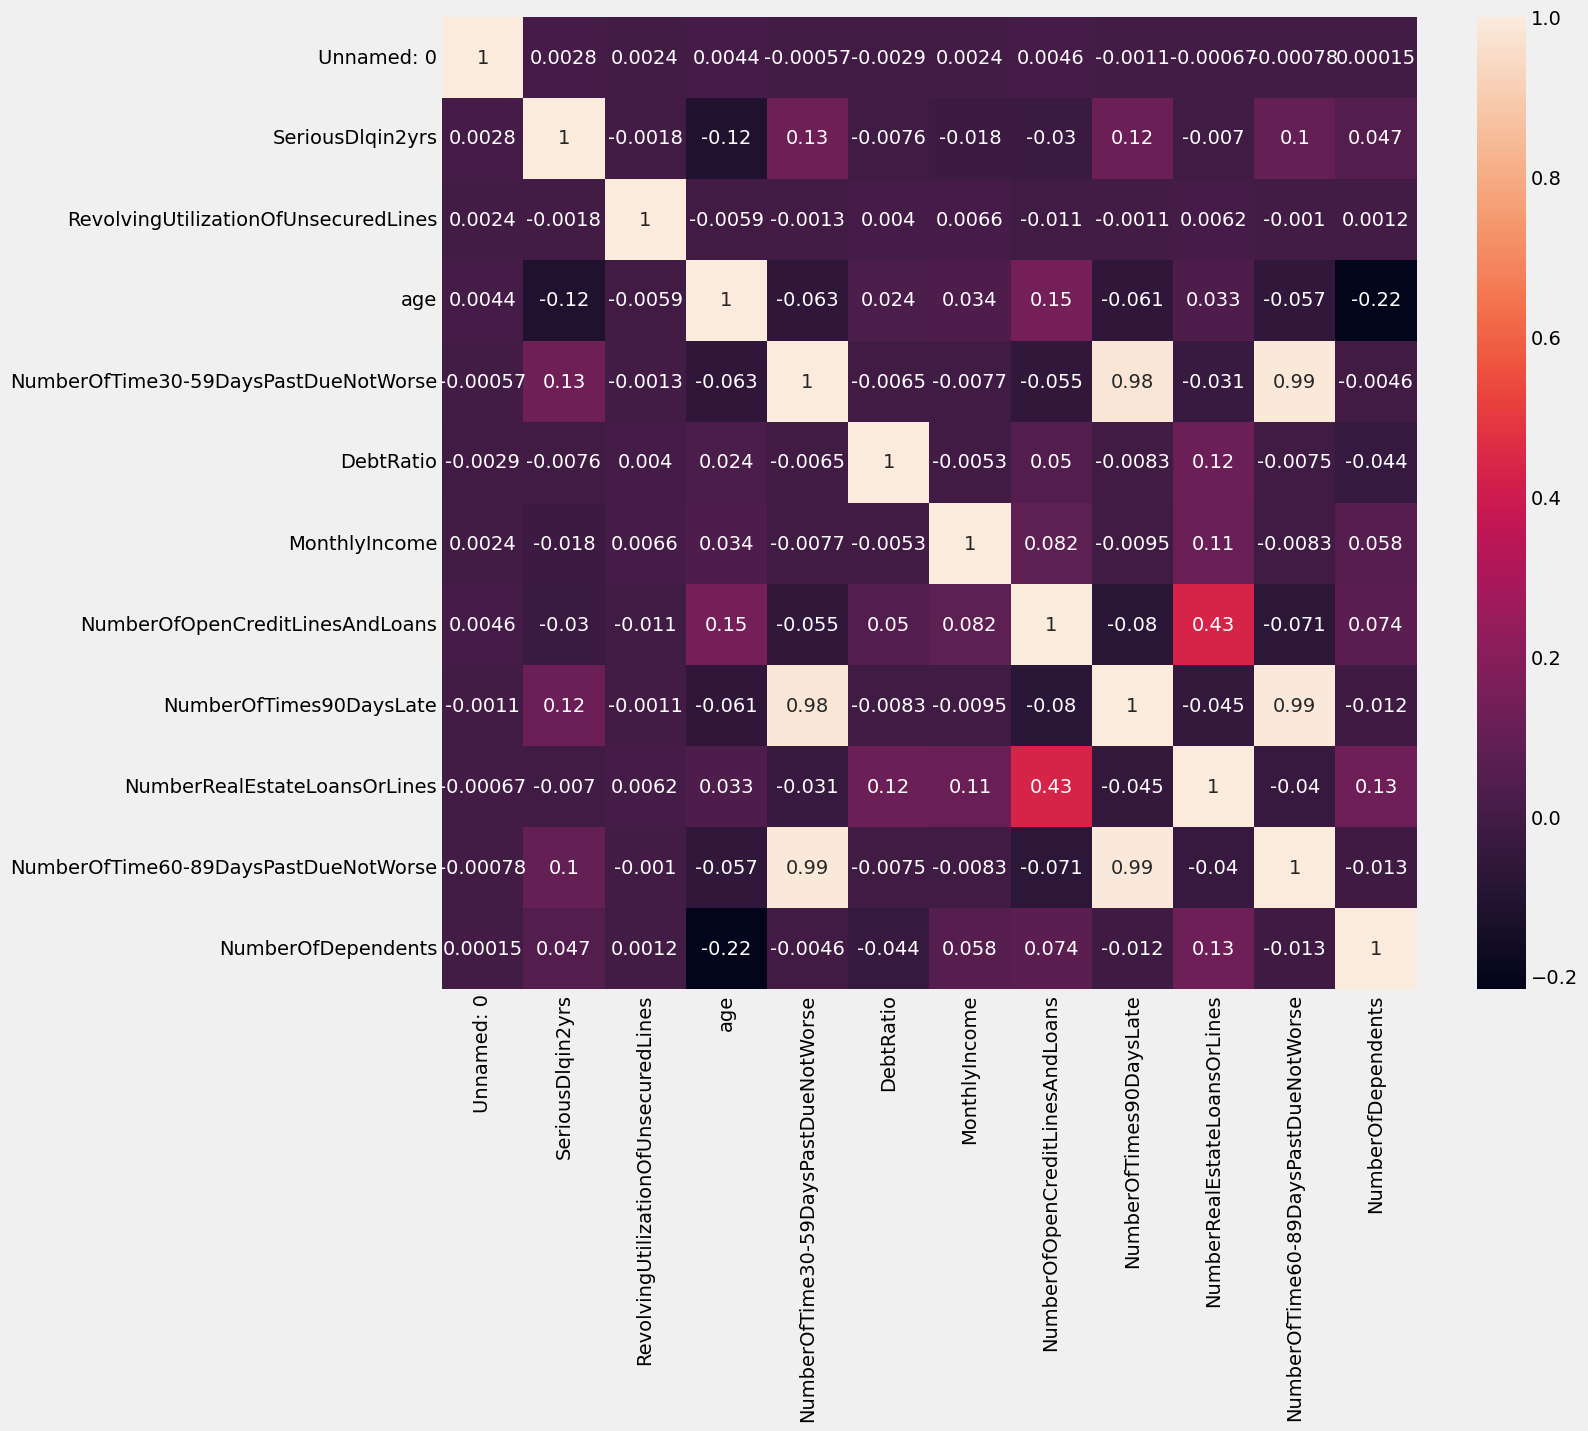

In [17]:
corr = train_data.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [43]:
train_data["CombinedDefaulted"] = (train_data["NumberOfTimes90DaysLate"] + train_data["NumberOfTime60-89DaysPastDueNotWorse"] + train_data["NumberOfTime30-59DaysPastDueNotWorse"])

In [44]:
train_data.loc[(train_data["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1

In [45]:
train_data["CombinedCreditLoans"] = train_data["NumberOfOpenCreditLinesAndLoans"] + train_data["NumberRealEstateLoansOrLines"]

In [46]:
train_data.loc[(train_data["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
train_data.loc[(train_data["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1

In [47]:
train_data.CombinedCreditLoans.value_counts()

CombinedCreditLoans
1    111375
0     38625
Name: count, dtype: int64

In [48]:
train_data["WithDependents"] = train_data["NumberOfDependents"]
train_data.loc[(train_data["WithDependents"] >= 1), "WithDependents"] = 1

In [49]:
train_data.WithDependents.value_counts()

WithDependents
0    90826
1    59174
Name: count, dtype: int64

In [50]:
train_data["MonthlyDebtPayments"] = train_data["DebtRatio"] * train_data["MonthlyIncome"]
train_data["MonthlyDebtPayments"] = np.absolute(train_data["MonthlyDebtPayments"])
train_data["MonthlyDebtPayments"] = train_data["MonthlyDebtPayments"].astype('int64')

In [51]:
train_data["age"] = train_data["age"].astype('int64')
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].astype('int64')

In [52]:
train_data["age_map"] = train_data["age"]
train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60), "age_map"] = 1
train_data.loc[(train_data["age"] >= 60), "age_map"] = 0 

In [53]:
#replacing those numbers to categorical features then get the dummy variables
train_data["age_map"] = train_data["age_map"].replace(0, "working")
train_data["age_map"] = train_data["age_map"].replace(1, "senior")

In [54]:
train_data = pd.concat([train_data, pd.get_dummies(train_data.age_map,prefix='is')], axis=1)
# Drop the original categorical column
train_data.drop(columns=["age_map"], inplace=True)

<Axes: >

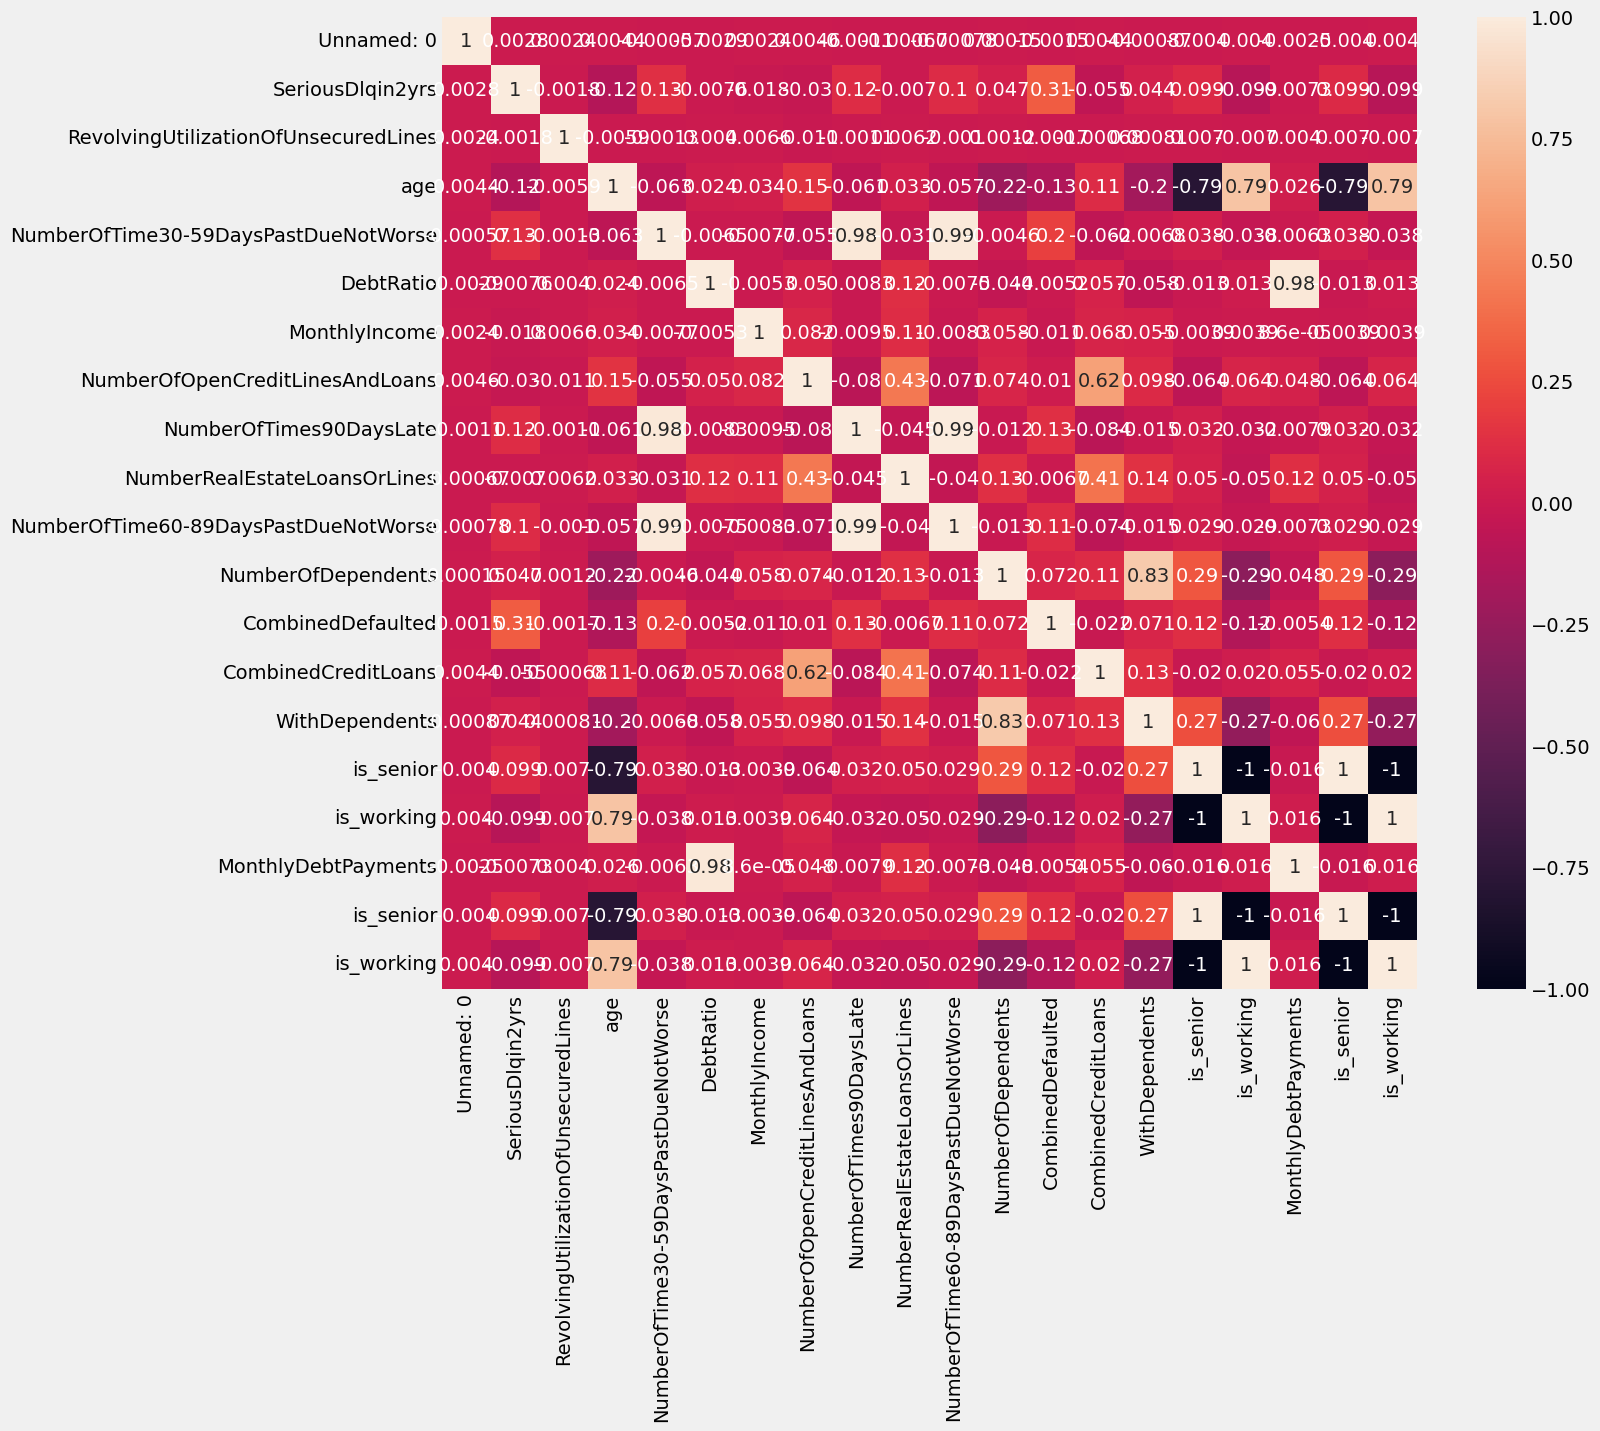

In [55]:
corr = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [39]:
train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans',
       'WithDependents', 'is_senior', 'is_working'],
      dtype='object')

In [57]:
train_data.drop(["Unnamed: 0","NumberOfOpenCreditLinesAndLoans",\
                 "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse",\
                 "WithDependents","is_senior","is_working", "MonthlyDebtPayments"], axis=1, inplace=True)

In [58]:
train_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

<Axes: >

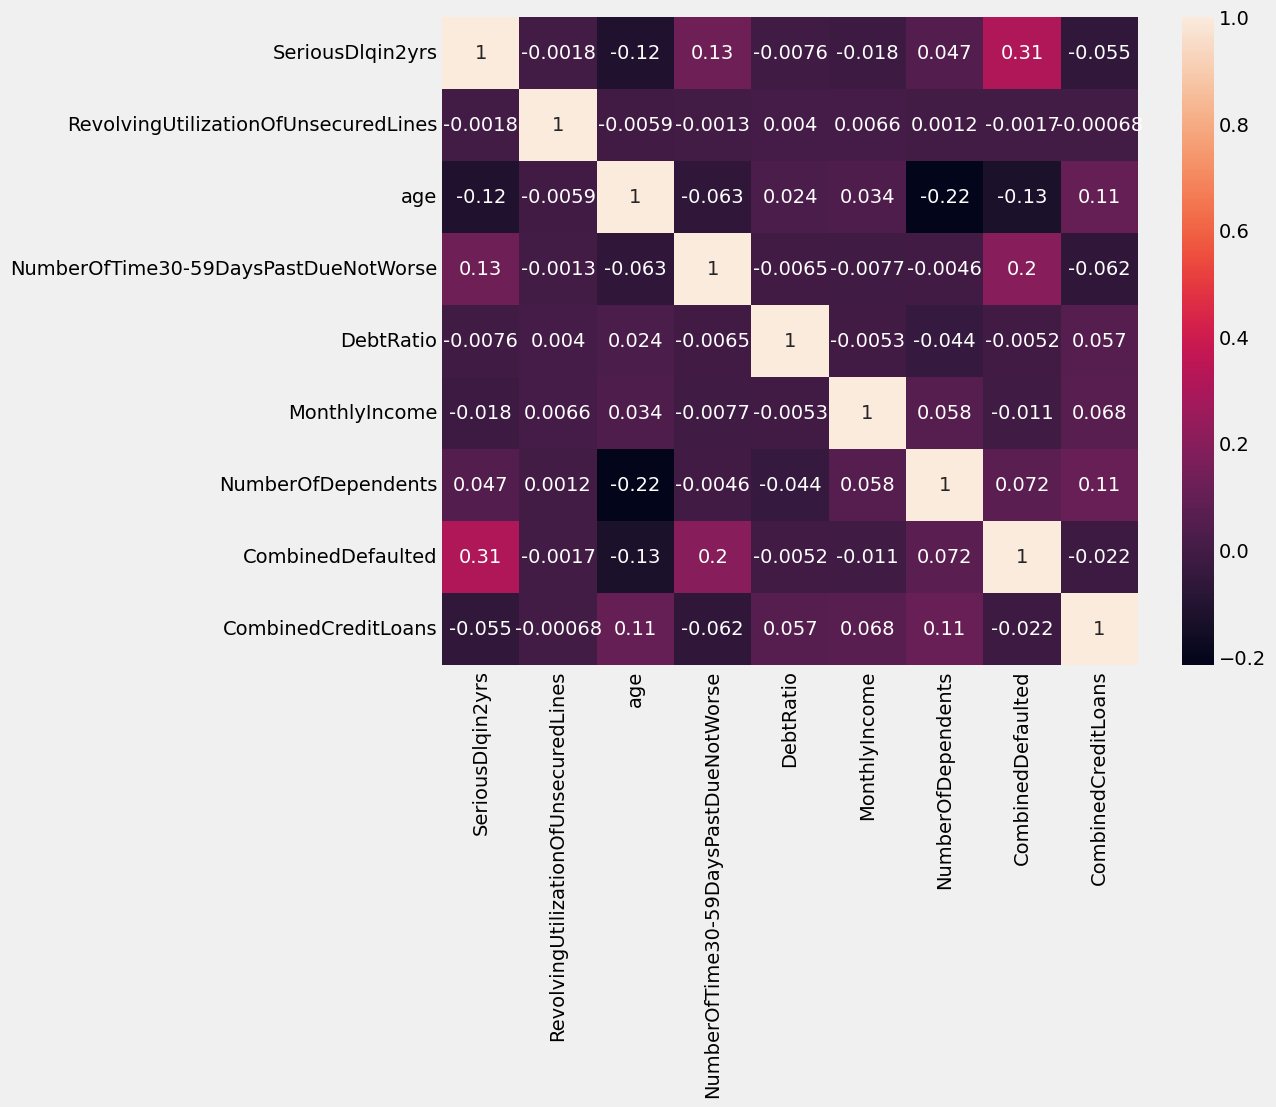

In [59]:
#now let's take a look at the filtered final features to be used in predicting the financial distress for the next two years
corr = train_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g")

In [60]:
def cleaned_dataset(dataset):
    dataset.loc[dataset["age"] <= 18, "age"] = dataset.age.median()
    
    age_working = dataset.loc[(dataset["age"] >= 18) & (dataset["age"] < 60)]
    age_senior = dataset.loc[(dataset["age"] >= 60)]

    age_working_impute = age_working.MonthlyIncome.mean()
    age_senior_impute = age_senior.MonthlyIncome.mean()

    dataset["MonthlyIncome"] = np.absolute(dataset["MonthlyIncome"])
    dataset["MonthlyIncome"] = dataset["MonthlyIncome"].fillna(99999)
    dataset["MonthlyIncome"] = dataset["MonthlyIncome"].astype('int64')

    dataset.loc[((dataset["age"] >= 18) & (dataset["age"] < 60)) & (dataset["MonthlyIncome"] == 99999),\
                   "MonthlyIncome"] = age_working_impute
    dataset.loc[(train_data["age"] >= 60) & (dataset["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_senior_impute
    dataset["NumberOfDependents"] = np.absolute(dataset["NumberOfDependents"])
    dataset["NumberOfDependents"] = dataset["NumberOfDependents"].fillna(0)
    dataset["NumberOfDependents"] = dataset["NumberOfDependents"].astype('int64')

    dataset["CombinedDefaulted"] = (dataset["NumberOfTimes90DaysLate"] + dataset["NumberOfTime60-89DaysPastDueNotWorse"])\
                                            + dataset["NumberOfTime30-59DaysPastDueNotWorse"]

    dataset.loc[(dataset["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1

    dataset["CombinedCreditLoans"] = dataset["NumberOfOpenCreditLinesAndLoans"] + \
                                            dataset["NumberRealEstateLoansOrLines"]
    dataset.loc[(dataset["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
    dataset.loc[(dataset["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1

    dataset.drop(["Unnamed: 0","NumberOfOpenCreditLinesAndLoans",\
                 "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse"], axis=1, inplace=True)

cleaned_dataset(test_data)

C:\Users\ellio\AppData\Local\Temp\ipykernel_30624\2823152905.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6596.628562971217' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[((dataset["age"] >= 18) & (dataset["age"] < 60)) & (dataset["MonthlyIncome"] == 99999),\


In [61]:
test_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

In [62]:
train_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

In [63]:
train_data.shape, test_data.shape

((150000, 9), (101503, 9))

In [64]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         101503 non-null  float64
 6   NumberOfDependents                    101503 non-null  int64  
 7   CombinedDefaulted                     101503 non-null  int64  
 8   CombinedCreditLoans                   101503 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 7.0 MB


In [65]:
X = train_data.drop("SeriousDlqin2yrs", axis=1).copy()
y = train_data.SeriousDlqin2yrs
X.shape, y.shape

((150000, 8), (150000,))

In [66]:
X_test = test_data.drop("SeriousDlqin2yrs", axis=1).copy()
y_test = test_data.SeriousDlqin2yrs
X_test.shape, y_test.shape

((101503, 8), (101503,))

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict #to perform stratified sampling using cv param
from sklearn.metrics import roc_curve, roc_auc_score #AUC score
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)
logit = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500)
scaler = StandardScaler().fit(X_train)

In [68]:
X_train_scaled = scaler.transform(X_train) #scaling features!
X_val_scaled = scaler.transform(X_val)

In [69]:
logit.fit(X_train_scaled, y_train)
logit_scores_proba = logit.predict_proba(X_train_scaled)
logit_scores = logit_scores_proba[:,1]

In [70]:
#lets make a roc_curve visualization
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

AUC Score 0.8037465799063744


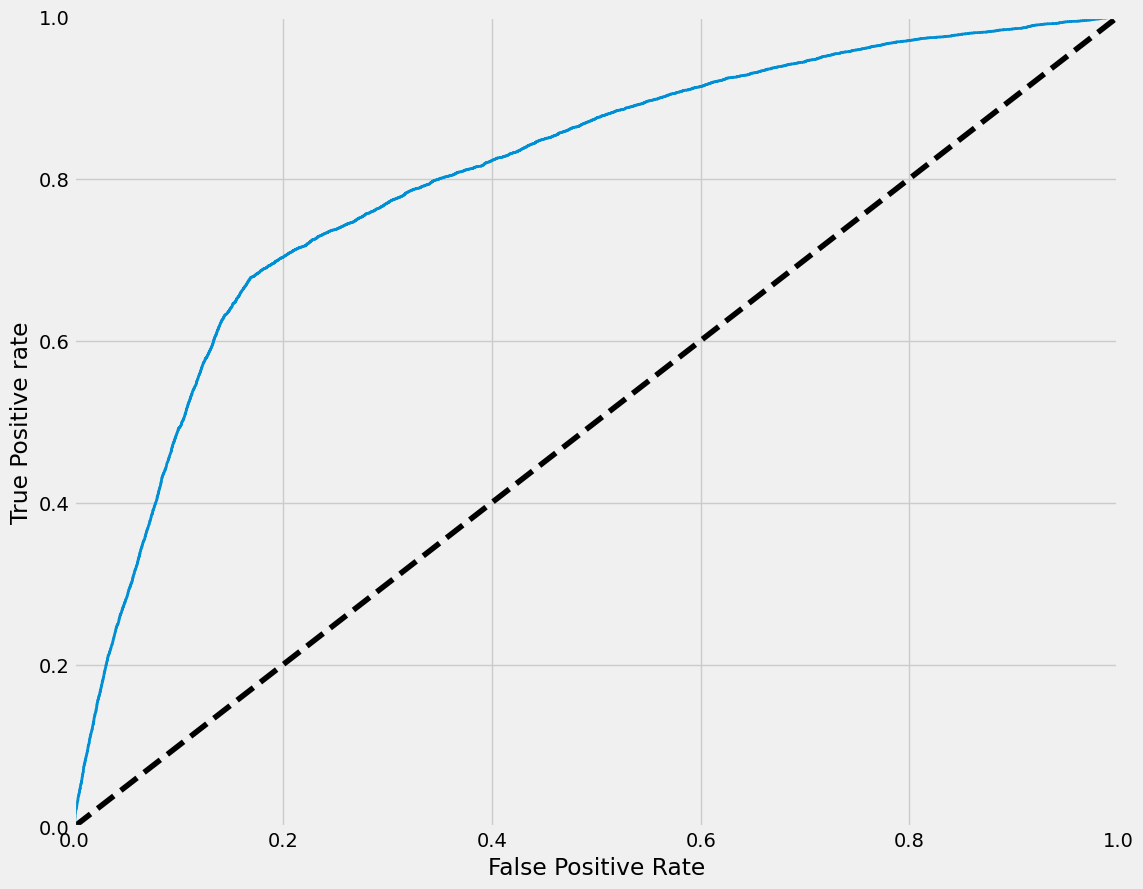

In [71]:
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)
plot_roc_curve(fpr_logit,tpr_logit)
print("AUC Score {}".format(roc_auc_score(y_train,logit_scores)))

AUC Score 0.8011665203065631


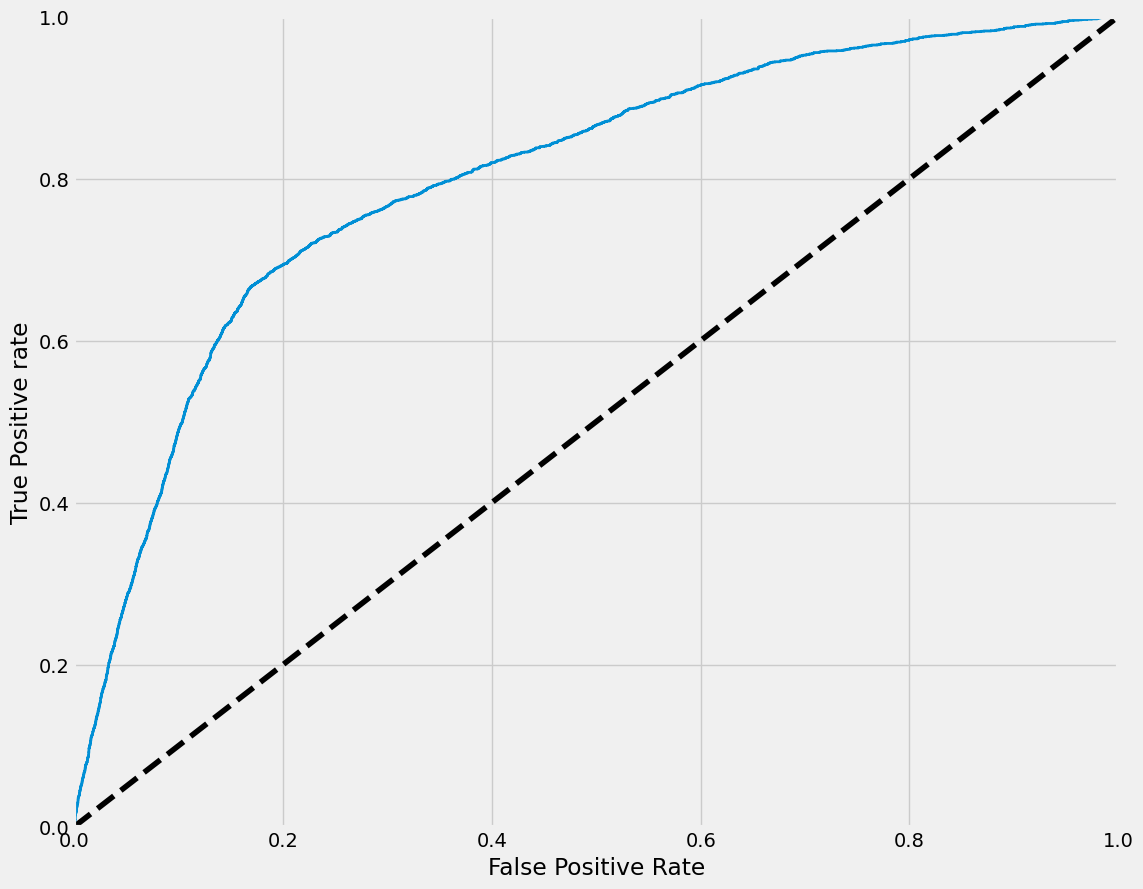

In [72]:
#validate with the validation set
logit_scores_proba_val = logit.predict_proba(X_val_scaled)
logit_scores_val = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_val, logit_scores_val)
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print("AUC Score {}".format(roc_auc_score(y_val,logit_scores_val)))

In [73]:
logit_C_low = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=0.001, max_iter=1000)
logit_C_low.fit(X_train_scaled, y_train)
logit_C_low_scores_proba = logit_C_low.predict_proba(X_train_scaled)
logit_C_low_scores = logit_C_low_scores_proba[:,1]
fpr_logit_C_low, tpr_logit_C_low, thresh_logit_C_low = roc_curve(y_train, logit_C_low_scores)
#plot_roc_curve(fpr_logit_C_low,tpr_logit_C_low)
print("AUC Score {}".format(roc_auc_score(y_train,logit_C_low_scores)))

AUC Score 0.8022986283798269


In [74]:
logit_C_high = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1000, max_iter=1000)
logit_C_high.fit(X_train_scaled, y_train)
logit_C_high_scores_proba = logit_C_high.predict_proba(X_train_scaled)
logit_C_high_scores = logit_C_high_scores_proba[:,1]
fpr_logit_C_high, tpr_logit_C_high, thresh_logit_C_high = roc_curve(y_train, logit_C_high_scores)
print("AUC Score {}".format(roc_auc_score(y_train,logit_C_high_scores)))

AUC Score 0.8037479212822443


Text(0, 0.5, 'True Positive rate')

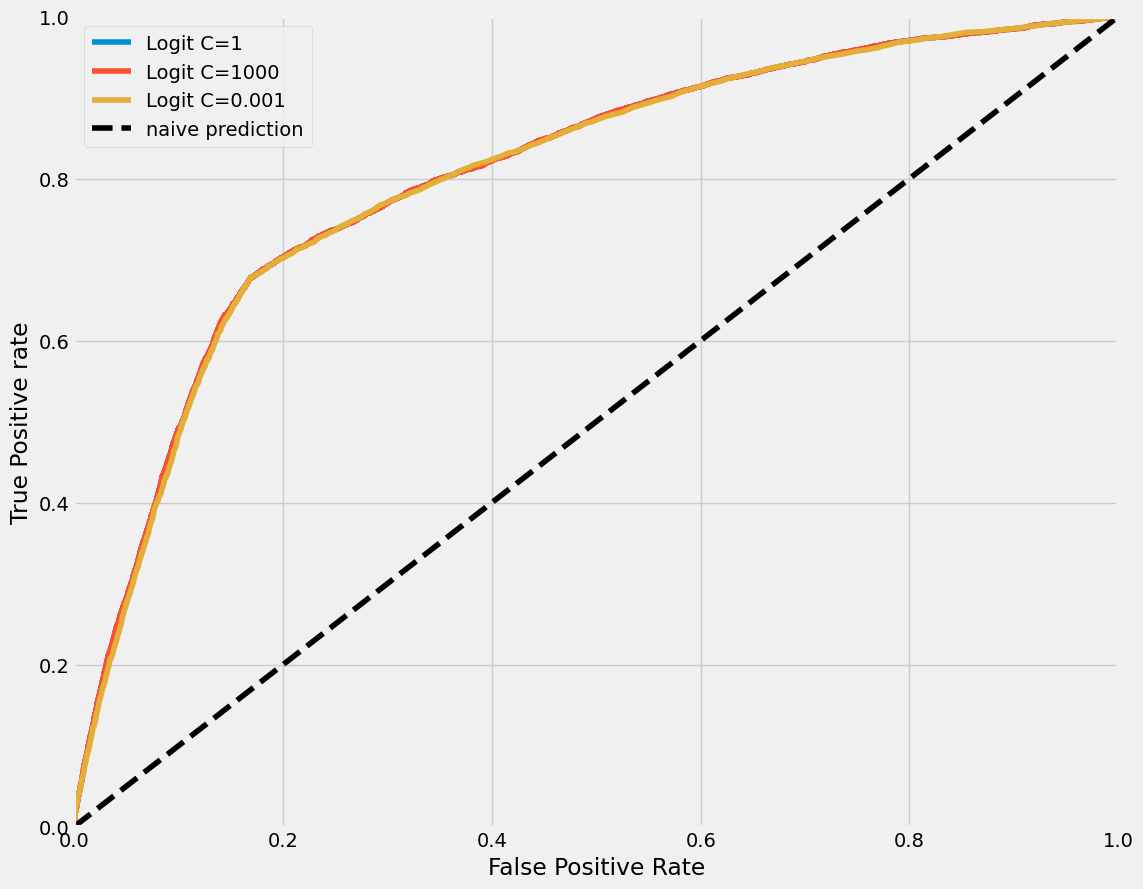

In [75]:
#lets make a roc_curve visualization
plt.figure(figsize=(12,10))
plt.plot(fpr_logit, tpr_logit, label="Logit C=1")
plt.plot(fpr_logit_C_high, tpr_logit_C_high , label="Logit C=1000")
plt.plot(fpr_logit_C_low, tpr_logit_C_low , label="Logit C=0.001")
plt.plot([0,1],[0,1], "k--", label="naive prediction")
plt.axis([0,1,0,1])
plt.legend(loc="best")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

In [76]:
#Random Sampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print("Original dataset shape {}".format(Counter(y)))

Original dataset shape Counter({0: 139974, 1: 10026})


In [78]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X,y)
print("Resampled dataset shape {}".format(Counter(y_resampled)))

Resampled dataset shape Counter({0: 10026, 1: 10026})


In [79]:
from sklearn.model_selection import train_test_split
X_train_rus, X_val_rus, y_train_rus, y_val_rus = train_test_split(X_resampled, y_resampled, random_state=42)
X_train_rus.shape, y_train_rus.shape

((15039, 8), (15039,))

In [80]:
scaler = StandardScaler().fit(X_train_rus)
X_train_rus_scaled = scaler.transform(X_train_rus)
X_val_rus_scaled = scaler.transform(X_val_rus)

AUC Score 0.8026716117914563


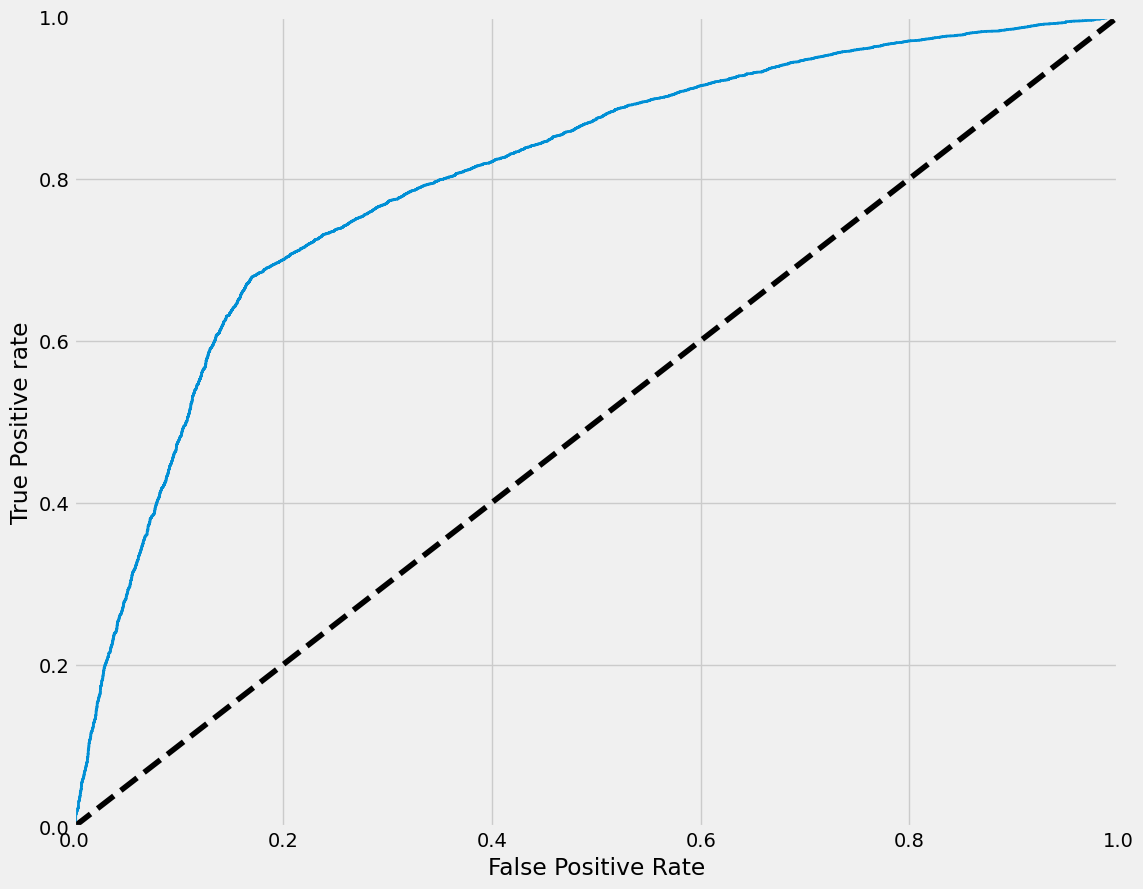

In [81]:
logit_resampled = LogisticRegression(random_state=42, solver="saga", penalty="l1", C=1.0, max_iter=500)
logit_resampled.fit(X_train_rus_scaled, y_train_rus)
logit_resampled_proba_res = logit_resampled.predict_proba(X_train_rus_scaled)
logit_resampled_scores = logit_resampled_proba_res[:,1]
fpr_logit_resampled, tpr_logit_resampled, thresh_logit_resampled = roc_curve(y_train_rus, logit_resampled_scores)
plot_roc_curve(fpr_logit_resampled,tpr_logit_resampled)
print("AUC Score {}".format(roc_auc_score(y_train_rus, logit_resampled_scores)))

AUC Score 0.8526833850127096


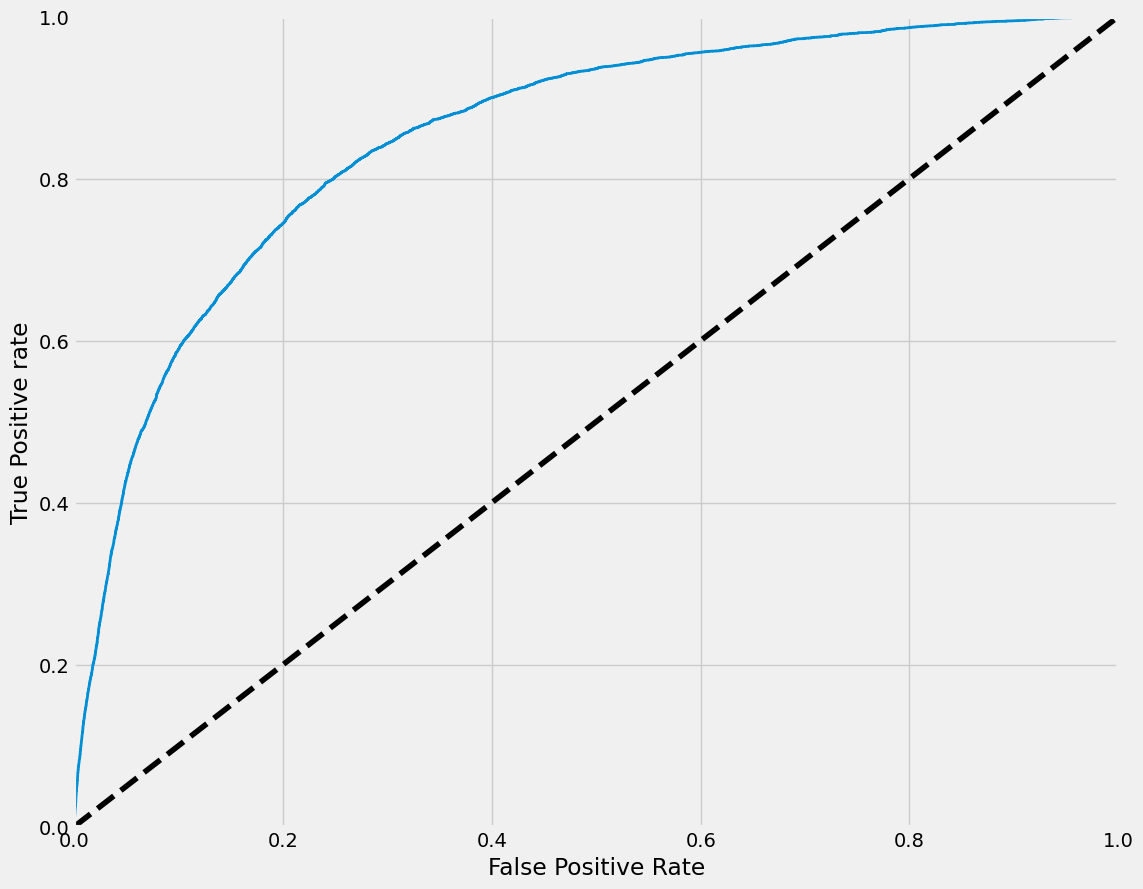

In [82]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
forest = RandomForestClassifier(random_state=42,n_estimators=300, max_depth=5, class_weight="balanced")
forest.fit(X_train,y_train) #Using the original dataset, not the resampled
y_scores_proba = forest.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores))) #max_depth=5 .8525 #7 .864 cross .85 #10 .89 cross .85 #9 .88 cross .853 #12 .92 cross .84 Overfit!

AUC Score 0.8489658267182891


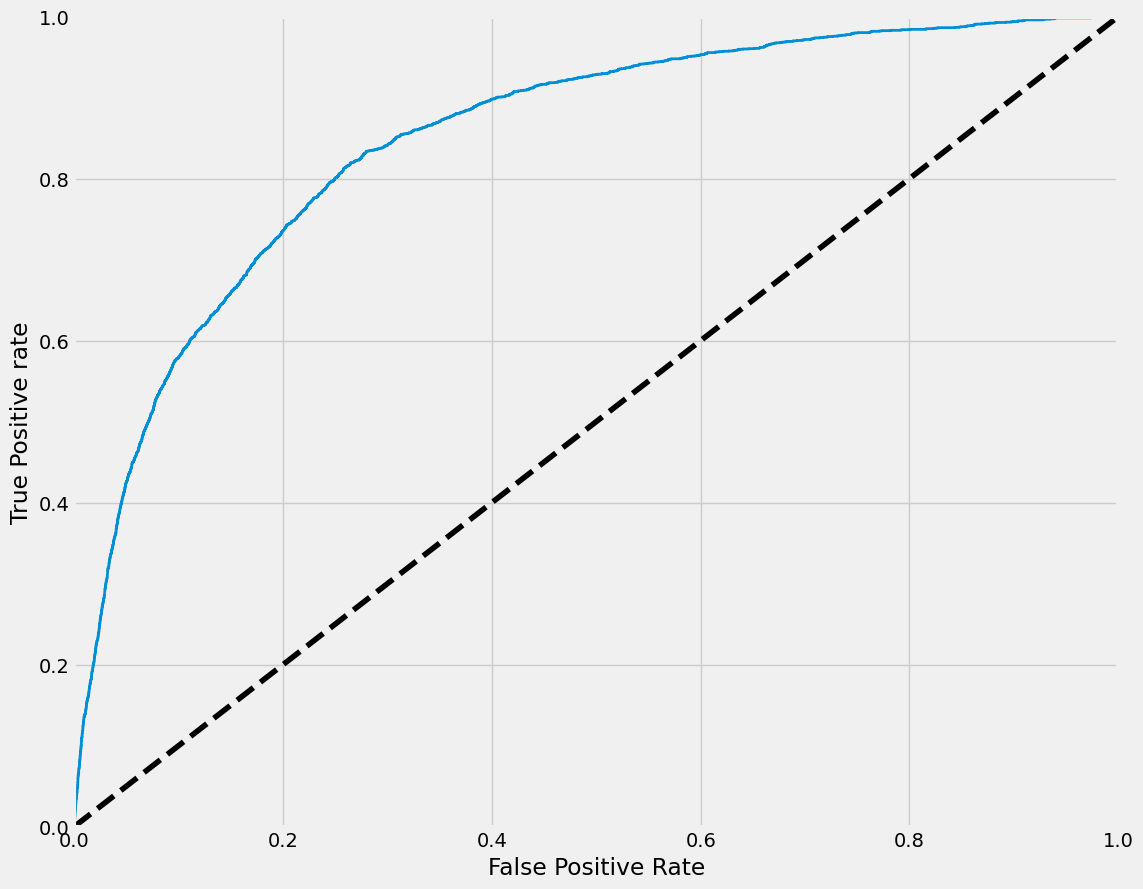

In [83]:
#Let's cross validate
y_val_proba = forest.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

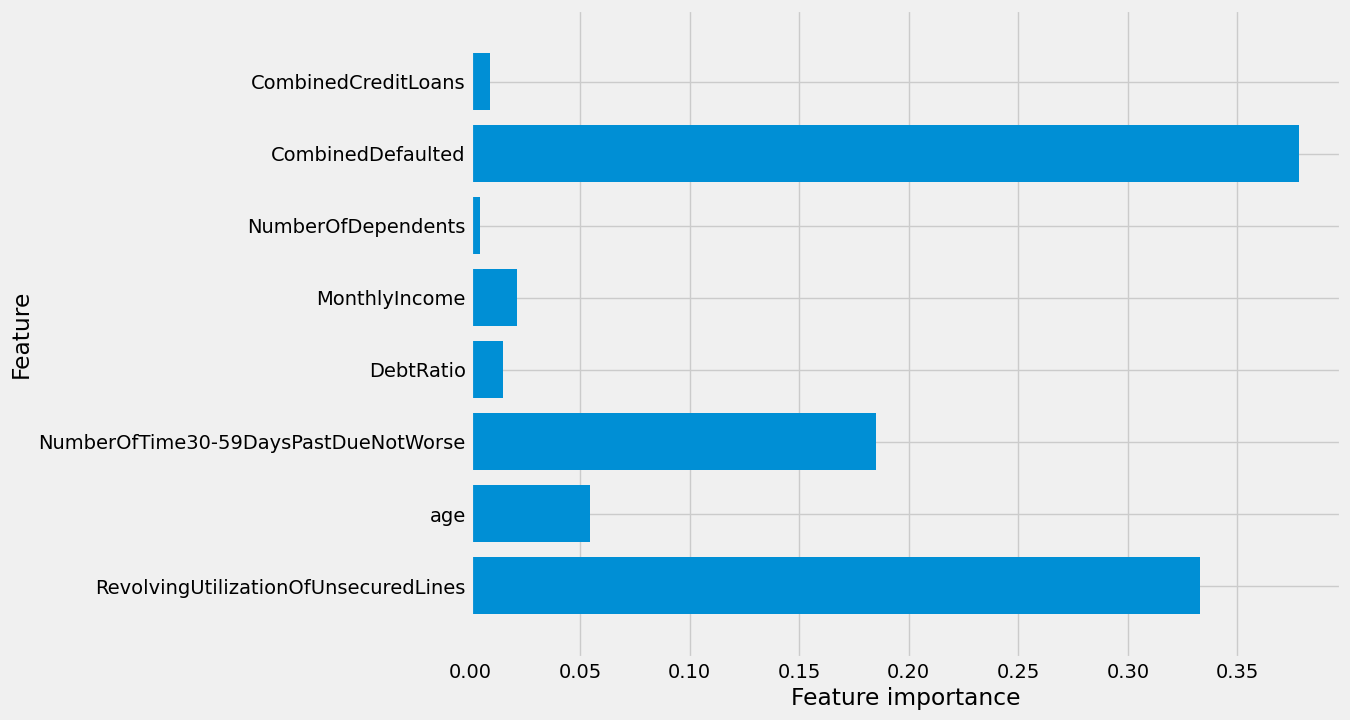

In [84]:
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

AUC Score 0.9342593314071099


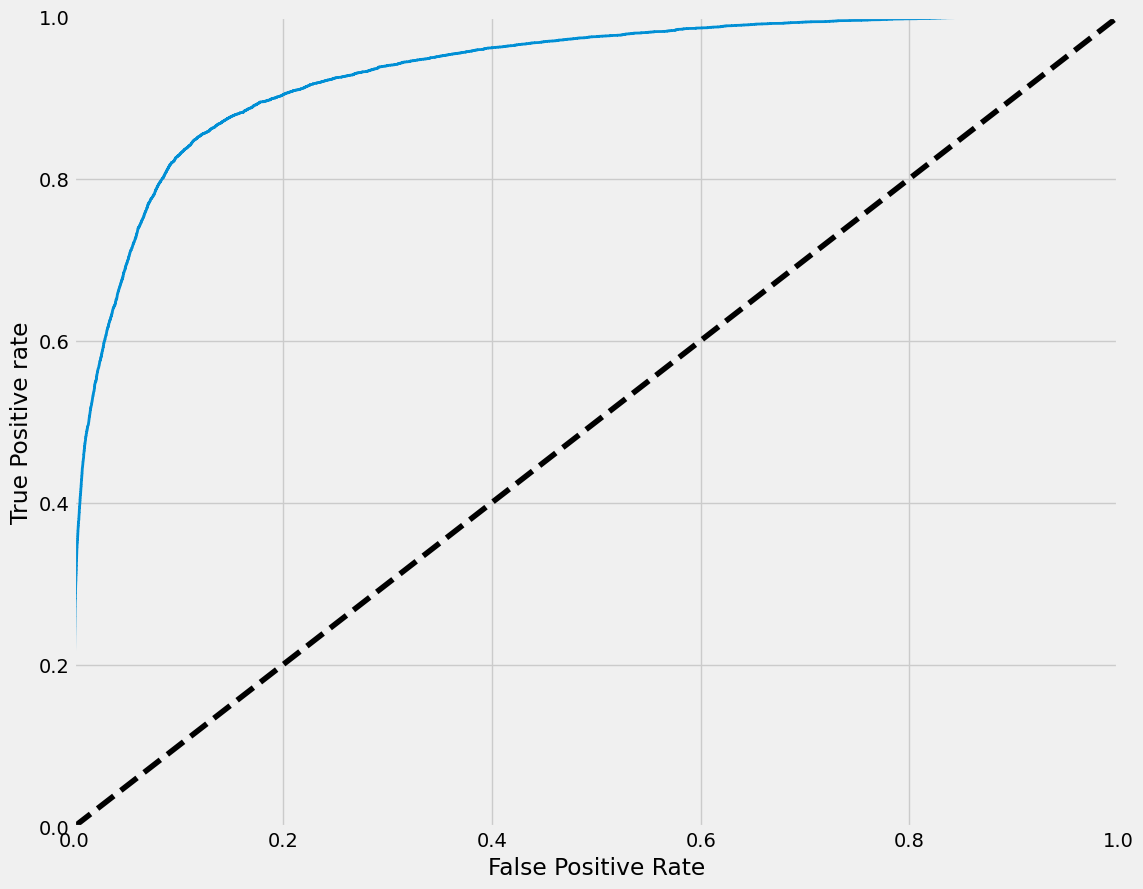

In [85]:
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)
gbc_clf.fit(X_train,y_train)
gbc_clf_proba = gbc_clf.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_train, gbc_clf_scores)))

In [86]:
#validation
gbc_val_proba = gbc_clf.predict_proba(X_val)
gbc_val_scores = gbc_val_proba[:,1]
print("AUC Score {}".format(roc_auc_score(y_val, gbc_val_scores)))

AUC Score 0.853532936791181


In [87]:
gbc_clf_submission = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05 ,max_depth=4,  random_state=42)
gbc_clf_submission.fit(X_train,y_train)
gbc_clf_proba = gbc_clf_submission.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
gbc_val_proba = gbc_clf_submission.predict_proba(X_val)
gbc_val_scores = gbc_val_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
print("AUC Score {}".format(roc_auc_score(y_train, gbc_clf_scores))), print("AUC Score {}".format(roc_auc_score(y_val, gbc_val_scores)))

AUC Score 0.8659575939300126
AUC Score 0.8561770048810734


(None, None)

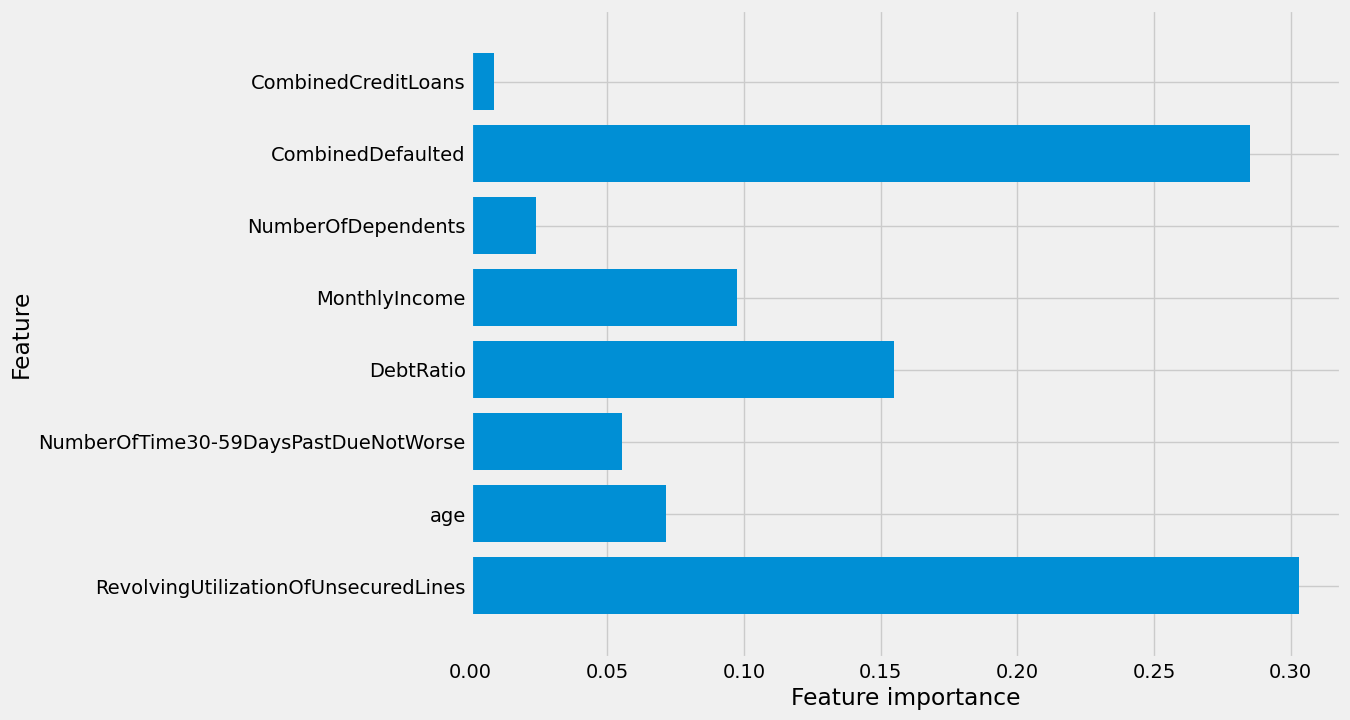

In [89]:
plot_feature_importances(gbc_clf)